In [1]:
import sys
if '../' not in sys.path: sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2

from data.MNIST.data_extraction import *
from RBM import *

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
X_train = np.asarray(read_image_file(IMAGES_TRAIN)) / 255.0
X_train = (X_train > .15).astype(int)
X_train = np.asarray([x.reshape(28 * 28) for x in X_train])
X_train.shape

(60000, 784)

In [4]:
nn = RBM(layers=[
        BernoulliLayer(X_train.shape[1]),
        BernoulliLayer(100)
    ], loss_function='NLL')

In [5]:
%time nn.fit(X_train, n_epochs=75, learning_rate=.1, n_gibbs_steps=1, batch_size=20, test_size=.015)

epoch = 74; learning_rate = 0.1; criteria_train = 59.2322957758; criteria_test = 61.4953639533; 
CPU times: user 3h 19min 33s, sys: 3min 36s, total: 3h 23min 9s
Wall time: 1h 47min 3s


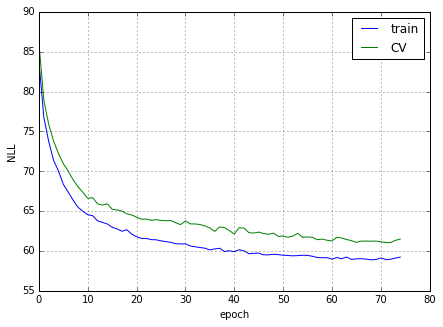

In [6]:
plt.figure(figsize=(7, 5))

plt.plot(nn.error_train, label='train')
if nn.error_test:
    plt.plot(nn.error_test, label='CV')

plt.xlabel('epoch')
plt.ylabel(nn.loss_function)
plt.legend()
plt.grid()

In [7]:
def plot_filters(df, n, m, w=8, h=8):
    a1, a2 = float(n) / (n + m), float(m) / (n + m)
    f, axarr = plt.subplots(n, m, figsize=(2 * w * a2, 2 * h * a1))
    f.subplots_adjust(wspace=0, hspace=0)
    for i in range(n):
        for j in range(m):
            axarr[i, j].imshow(df[m * i + j], cmap='gray')
            axarr[i, j].tick_params(
                axis='both', which='both',
                bottom='off', top='off', right='off', left='off',
                labelbottom='off', labelleft='off'
            )
            for spine in axarr[i, j].spines.values():
                spine.set_edgecolor('#ffffff')

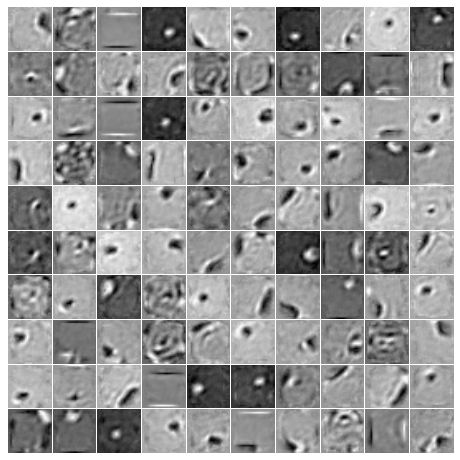

In [8]:
df = [nn.weights[:, i].reshape(28, 28) for i in range(nn.layers[1].n_neurons)]
plot_filters(df, 10, 10)

## Reconstruction

In [9]:
n_objects, offset = 100, 0

X_test = np.asarray(read_image_file(IMAGES_TRAIN, n_objects=n_objects, offset=offset)) / 255.0
X_test = (X_test > .15).astype(int)
X_test.shape

(100, 28, 28)

In [10]:
def plot_numbers(df, n, m, w=6, h=6):
    a1, a2 = float(n) / (n + m), float(m) / (n + m)
    f, axarr = plt.subplots(n, m, figsize=(2 * w * a2, 2 * h * a1))
    f.subplots_adjust(wspace=0, hspace=0)
    for i in range(n):
        for j in range(m):
            axarr[i, j].imshow(df[m * i + j], cmap='gray_r')
            axarr[i, j].tick_params(
                axis='both', which='both',
                bottom='off', top='off', right='off', left='off',
                labelbottom='off', labelleft='off'
            )

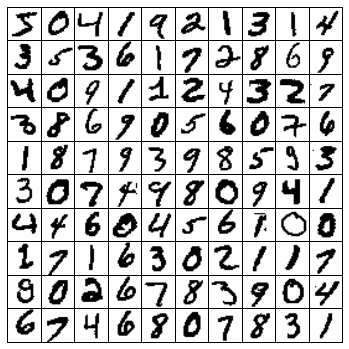

In [11]:
plot_numbers(X_test, 10, 10)

In [12]:
X_test_01 = np.asarray([x.reshape(28 * 28) for x in X_test])
X_test_01.shape

(100, 784)

In [13]:
X_pred = nn.predict(X_test_01, batch_size=20, n_steps=1).reshape(-1, 28, 28)
X_pred.shape

(100, 28, 28)

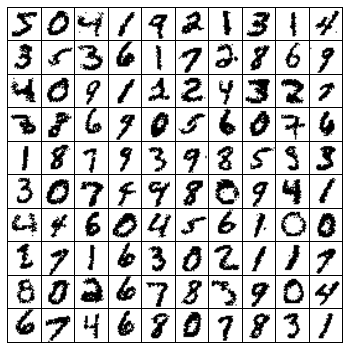

In [14]:
plot_numbers(X_pred, 10, 10)

In [15]:
X_test_02 = X_test.copy()
X_test_02[:, np.arange(X_test.shape[1]) > X_test_02.shape[1] // 2, :] = 0

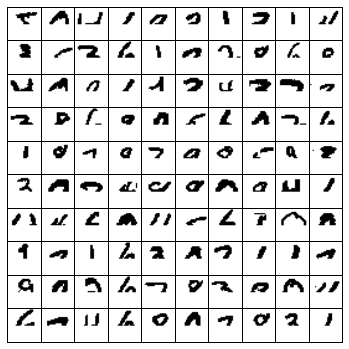

In [16]:
plot_numbers(X_test_02, 10, 10)

In [17]:
X_test_02 = np.asarray([x.reshape(28 * 28) for x in X_test_02])
X_test_02.shape

(100, 784)

In [18]:
X_pred = nn.predict(X_test_02, batch_size=20, n_steps=1).reshape(-1, 28, 28)
X_pred.shape

(100, 28, 28)

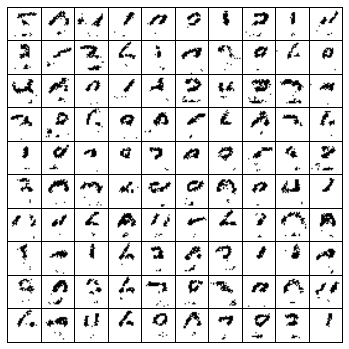

In [19]:
plot_numbers(X_pred, 10, 10)